# **EJERCICIO 2: Clasificador K-NN con Bootstrapping**

## **Enunciado (1.0 puntos):**
*Implemente el clasificador K-NN sobre la base de datos Iris (usando las cuatro características y las tres clases) e investigue su desempeño mediante el método de bootstrapping a medida que se aumenta el número de vecinos empleado. Proponga una estrategia práctica de selección de k si este algoritmo se usara en un caso real con datos de otra naturaleza.*

## **Justificación de la Metodología:**
- **K-NN**: Clasificador no paramétrico basado en proximidad, sin suposiciones sobre distribuciones
- **Dataset completo**: Todas las características (4) y clases (3) para análisis comprehensivo
- **Bootstrapping**: Estimación robusta de la distribución del rendimiento con intervalos de confianza
- **Variación sistemática de k**: Análisis del trade-off sesgo-varianza en función del número de vecinos
- **Estrategia práctica**: Desarrollo de metodología generalizable para selección de hiperparámetros

## **Objetivos Específicos:**
1. Implementar K-NN con evaluación bootstrap para múltiples valores de k
2. Analizar cómo varía el rendimiento al aumentar el número de vecinos
3. Identificar el valor óptimo de k para este dataset específico
4. Proponer metodología práctica para selección de k en nuevos dominios

### **2.1 Preparación de Datos**

In [1]:
%run -i exam.py

✓ Configuración cargada exitosamente
Dataset: dataset-iris.csv
Características: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Clases Ejercicio 1: ['Iris-setosa', 'Iris-versicolor']
Clases Ejercicio 2: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
CV Folds: 10
Bootstrap Iteraciones: 1000
Rango K para K-NN: 1-30
✓ Todas las librerías importadas exitosamente
📊 Configuración de visualización establecida
🔧 Clasificadores disponibles: GaussianNB, LinearDiscriminantAnalysis, KNeighborsClassifier
✓ Funciones utilitarias definidas:
  - load_and_prepare_data(): Carga agnóstica de datos
  - calculate_comprehensive_metrics(): Métricas comprehensivas
  - print_metrics_summary(): Resumen de métricas
✓ Función manual_kfold_cv implementada
✓ Función manual_bootstrap implementada
✓ Funciones de visualización mejoradas implementadas


🔍 EJERCICIO 2: Preparando datos...
📋 **CONFIGURACIÓN DEL EXPERIMENTO:**
  - Clases objetivo: ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] (TODAS)
  - Características: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] (TODAS)
  - Rango de K: 1 a 30
  - Iteraciones bootstrap: 1000

📊 **PASO 1: Carga de dataset completo**

📊 **Resumen de los Datos:**
  - Forma: (150, 4) (150 muestras, 4 características)
  - Clases: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
  - Distribución por clase:
    • setosa: 50 muestras (33.3%)
    • versicolor: 50 muestras (33.3%)
    • virginica: 50 muestras (33.3%)

⚙️ **JUSTIFICACIÓN DE NORMALIZACIÓN:**
  ✅ K-NN usa distancia euclidiana: d = √Σ(xi-yi)²
  ✅ Características con diferentes escalas dominan el cálculo
  ✅ StandardScaler asegura contribución equitativa de todas las características
  ✅ Crítico para rendimiento óptimo del algoritmo

🔍 **ANÁLISIS EXPLORATORIO: Visualización en espacio reducido**


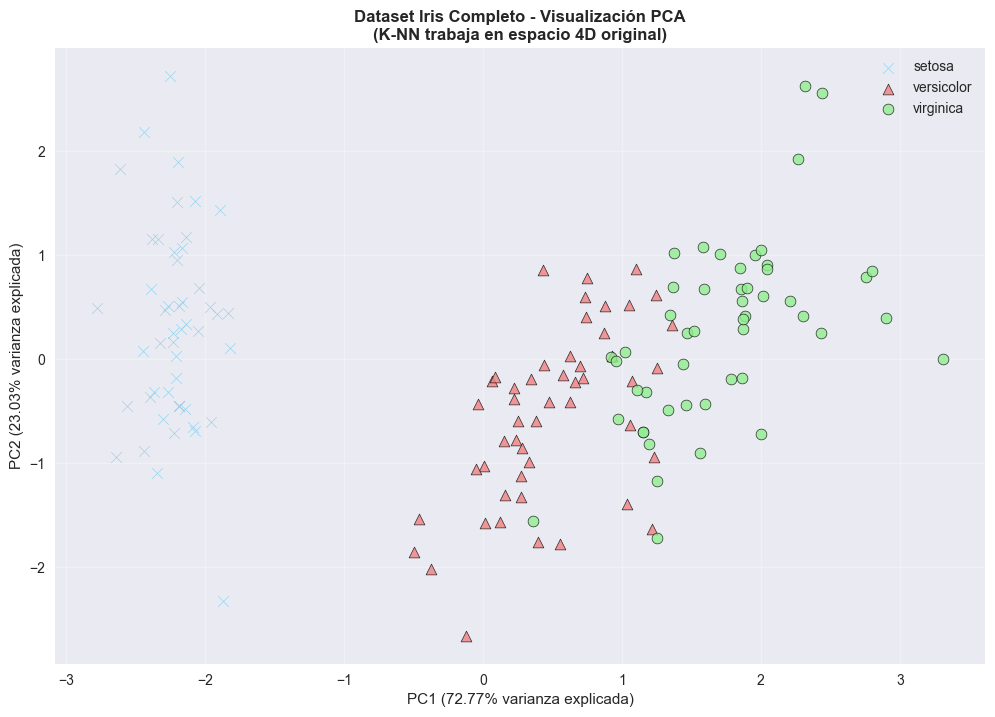


📈 **Características del Espacio de Datos:**
  - Varianza PC1: 0.728 (72.8%)
  - Varianza PC2: 0.230 (23.0%)
  - Total explicado: 0.958 (95.8%)
  - **NOTA**: K-NN usa espacio 4D

🎯 **EXPECTATIVAS PARA K-NN:**
  • Setosa: Bien separada → fácil clasificación
  • Versicolor vs Virginica: Parcialmente superpuestas → más desafiante
  • K pequeño: Menor sesgo, mayor varianza
  • K grande: Mayor sesgo, menor varianza
  • Objetivo: Encontrar K óptimo que balance sesgo-varianza


In [10]:
## **2.1 Preparación de Datos para K-NN Multiclase**

print("🔍 EJERCICIO 2: Preparando datos...")
print("📋 **CONFIGURACIÓN DEL EXPERIMENTO:**")
print(f"  - Clases objetivo: {CONFIG[Keys.EXERCISE2_CLASSES]} (TODAS)")
print(
    f"  - Características: {CONFIG[Keys.FEATURE_COLUMNS]} (TODAS)"
)
print(
    f"  - Rango de K: {min(CONFIG[Keys.KNN_K_RANGE])} a {max(CONFIG[Keys.KNN_K_RANGE])}"
)
print(f"  - Iteraciones bootstrap: {CONFIG[Keys.BOOTSTRAP_ITERATIONS]}")

# **PASO 1**: Cargar dataset completo
print("\n📊 **PASO 1: Carga de dataset completo**")
X_ex2, y_ex2, feature_names, class_names_ex2, scaler_ex2, label_encoder_ex2 = (
    load_and_prepare_data(CONFIG, classes=CONFIG[Keys.EXERCISE2_CLASSES])
)

print("\n📊 **Resumen de los Datos:**")
print(f"  - Forma: {X_ex2.shape} (150 muestras, 4 características)")
print(f"  - Clases: {class_names_ex2}")
print("  - Distribución por clase:")

for i, class_name in enumerate(class_names_ex2):
    count = np.sum(y_ex2 == i)
    percentage = (count / len(y_ex2)) * 100
    print(f"    • {class_name.split('-')[1]}: {count} muestras ({percentage:.1f}%)")

# **JUSTIFICACIÓN**: ¿Por qué normalizar para K-NN?
print("\n⚙️ **JUSTIFICACIÓN DE NORMALIZACIÓN:**")
print("  ✅ K-NN usa distancia euclidiana: d = √Σ(xi-yi)²")
print("  ✅ Características con diferentes escalas dominan el cálculo")
print(
    "  ✅ StandardScaler asegura contribución equitativa de todas las características"
)
print("  ✅ Crítico para rendimiento óptimo del algoritmo")

# **ANÁLISIS EXPLORATORIO**: Visualización 2D usando PCA
print("\n🔍 **ANÁLISIS EXPLORATORIO: Visualización en espacio reducido**")

pca = PCA(n_components=2, random_state=CONFIG[Keys.RANDOM_STATE])
X_pca = pca.fit_transform(X_ex2)

plt.figure(figsize=(12, 8))
colors = CONFIG[Keys.CLASS_COLORS][: len(class_names_ex2)]
markers = ["x", "^", "o"]

for i, (class_name, color, marker) in enumerate(zip(class_names_ex2, colors, markers)):
    mask = y_ex2 == i
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        c=color,
        marker=marker,
        s=60,
        alpha=0.8,
        label=class_name.split("-")[1],
        edgecolors="black",
        linewidth=0.5,
    )

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} varianza explicada)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} varianza explicada)")
plt.title(
    "Dataset Iris Completo - Visualización PCA\n(K-NN trabaja en espacio 4D original)",
    fontweight="bold",
)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n📈 **Características del Espacio de Datos:**")
print(
    f"  - Varianza PC1: {pca.explained_variance_ratio_[0]:.3f} ({pca.explained_variance_ratio_[0]:.1%})"
)
print(
    f"  - Varianza PC2: {pca.explained_variance_ratio_[1]:.3f} ({pca.explained_variance_ratio_[1]:.1%})"
)
print(
    f"  - Total explicado: {sum(pca.explained_variance_ratio_):.3f} ({sum(pca.explained_variance_ratio_):.1%})"
)
print("  - **NOTA**: K-NN usa espacio 4D")

# **EXPECTATIVAS INICIALES**: Análisis de complejidad del problema
print("\n🎯 **EXPECTATIVAS PARA K-NN:**")
print("  • Setosa: Bien separada → fácil clasificación")
print("  • Versicolor vs Virginica: Parcialmente superpuestas → más desafiante")
print("  • K pequeño: Menor sesgo, mayor varianza")
print("  • K grande: Mayor sesgo, menor varianza")
print("  • Objetivo: Encontrar K óptimo que balance sesgo-varianza")

## **2.2 Metodología: K-NN con Evaluación Bootstrap**

### **🎯 Bootstrapping para K-NN:**

#### **¿K-NN requiere evaluación especial?** Si.
- **Sensibilidad al conjunto de entrenamiento**: K-NN es un algoritmo basado en instancias
- **Dependencia de la distribución local**: Diferentes muestras → diferentes vecindarios
- **Variabilidad según k**: Cada valor de k tiene diferente balance sesgo-varianza
- **Ausencia de fase de entrenamiento**: No hay parámetros que "aprender" globalmente

#### **Qué permite bootstrapping?**
1. **Estimación robusta**: Múltiples muestras → distribución del rendimiento
2. **Intervalos de confianza**: Cuantifica incertidumbre en las estimaciones
3. **Evaluación out-of-bag**: Muestras no seleccionadas → conjunto de prueba natural
4. **Manejo de variabilidad**: Captura la sensibilidad inherente del algoritmo

#### **¿Qué esperamos?**
- **k=1**: Alta varianza (sensible a outliers), posible sobreajuste
- **k intermedio**: Balance óptimo sesgo-varianza
- **k grande**: Mayor sesgo (aproxima a clasificador de medias), menor varianza
- **k=N**: Clasificador constante (clase mayoritaria siempre)

### **🔬 Diseño Experimental:**
- **Rango de k**: 1 a 30 (comprehensiva)
- **Bootstrap**: 1000 iteraciones por k (estimación robusta)
- **Métricas**: Accuracy, precision, recall, F1-score con IC
- **Objetivo**: Identificar k óptimo y caracterizar curva de rendimiento

In [11]:
## **2.3 Implementación del Experimento Bootstrap**

print("=" * 80)
print("🎯 **PASO 2: EVALUACIÓN SISTEMÁTICA DE K-NN**")
print("=" * 80)

print("\n📋 **CONFIGURACIÓN DEL EXPERIMENTO:**")
print(
    f"  - Rango de k: {min(CONFIG[Keys.KNN_K_RANGE])} a {max(CONFIG[Keys.KNN_K_RANGE])}"
)
print(f"  - Iteraciones bootstrap por k: {CONFIG[Keys.BOOTSTRAP_ITERATIONS]}")
print("  - Métrica de distancia: euclidiana (apropiada para datos normalizados)")
print(
    f"  - Total de evaluaciones: {len(CONFIG[Keys.KNN_K_RANGE])} × {CONFIG[Keys.BOOTSTRAP_ITERATIONS]} = {len(CONFIG[Keys.KNN_K_RANGE]) * CONFIG[Keys.BOOTSTRAP_ITERATIONS]}"
)

# **JUSTIFICACIÓN TÉCNICA**: Parámetros del experimento
print("\n⚙️ **JUSTIFICACIÓN DE PARÁMETROS:**")
print(
    f"  ✅ Bootstrap con {CONFIG[Keys.BOOTSTRAP_ITERATIONS]} iteraciones: estimación estadísticamente robusta"
)
print("  ✅ Distancia euclidiana: apropiada para datos normalizados")
print("  ✅ Evaluación out-of-bag: evita sobreestimación del rendimiento")
print("  ✅ Semilla aleatoria fija: reproducibilidad de resultados")

# Almacenar resultados para cada k
knn_results = {}
k_values = CONFIG[Keys.KNN_K_RANGE]

print("\n🔄 **INICIANDO EVALUACIÓN EXPERIMENTAL:**")
print(f"Total de configuraciones a evaluar: {len(k_values)}")

# Evaluar cada valor de k
for i, k in enumerate(k_values):
    print(f"\n{'─' * 50}")
    print(
        f"🔬 Evaluando K-NN con k={k} ({i + 1}/{len(k_values)}) - {((i + 1) / len(k_values) * 100):.1f}%"
    )
    print(f"{'─' * 50}")

    # **PASO CRÍTICO**: Aplicar bootstrapping para este valor de k
    results = manual_bootstrap(
        X_ex2,
        y_ex2,
        KNeighborsClassifier,
        n_iterations=CONFIG[Keys.BOOTSTRAP_ITERATIONS],
        random_state=CONFIG[Keys.RANDOM_STATE],
        n_neighbors=k,
        metric="euclidean",
    )

    # Almacenar resultados
    knn_results[k] = results

    # **RESUMEN INMEDIATO**: Para seguimiento del experimento
    print(f"\n📊 **RESUMEN k={k}:**")
    print(
        f"  • Accuracy: {results['mean_accuracy']:.4f} ± {results['std_accuracy']:.4f}"
    )
    print(f"  • F1-Score: {results['mean_f1']:.4f} ± {results['std_f1']:.4f}")
    print(
        f"  • IC 95% Accuracy: [{results['confidence_interval_accuracy'][0]:.4f}, {results['confidence_interval_accuracy'][1]:.4f}]"
    )

    # Comentario interpretativo dinámico
    if k <= 1:
        print(f"    💡 k={k}: Máxima sensibilidad, posible sobreajuste")
    elif k <= 5:
        print(f"    💡 k={k}: Rango de baja complejidad")
    elif k <= 15:
        print(f"    💡 k={k}: Rango intermedio")
    else:
        print(f"    💡 k={k}: Rango de alta regularización")

print(f"\n{'🎉 EVALUACIÓN COMPLETADA EXITOSAMENTE':.^80}")
print(f"Total de resultados recopilados: {len(knn_results)} configuraciones")

# **VERIFICACIÓN**: Resumen de resultados obtenidos
print("\n📋 **VERIFICACIÓN DE RESULTADOS:**")
for k in sorted(list(knn_results.keys())[:5]):  # Mostrar solo los primeros 5
    acc = knn_results[k]["mean_accuracy"]
    std = knn_results[k]["std_accuracy"]
    print(f"  ✅ k={k}: {acc:.4f} ± {std:.4f}")
print(f"  ... y {len(knn_results) - 5} configuraciones más")

print("\n🔄 **SIGUIENTE PASO**: Análisis comparativo y visualización de resultados")


🎯 **PASO 2: EVALUACIÓN SISTEMÁTICA DE K-NN**

📋 **CONFIGURACIÓN DEL EXPERIMENTO:**
  - Rango de k: 1 a 30
  - Iteraciones bootstrap por k: 1000
  - Métrica de distancia: euclidiana (apropiada para datos normalizados)
  - Total de evaluaciones: 30 × 1000 = 30000

⚙️ **JUSTIFICACIÓN DE PARÁMETROS:**
  ✅ Bootstrap con 1000 iteraciones: estimación estadísticamente robusta
  ✅ Distancia euclidiana: apropiada para datos normalizados
  ✅ Evaluación out-of-bag: evita sobreestimación del rendimiento
  ✅ Semilla aleatoria fija: reproducibilidad de resultados

🔄 **INICIANDO EVALUACIÓN EXPERIMENTAL:**
Total de configuraciones a evaluar: 30

──────────────────────────────────────────────────
🔬 Evaluando K-NN con k=1 (1/30) - 3.3%
──────────────────────────────────────────────────
🔄 Ejecutando Bootstrapping con 1000 iteraciones...
📊 Total de muestras: 150
  Progreso: 10% (100/1000 iteraciones)
  Progreso: 20% (200/1000 iteraciones)
  Progreso: 30% (300/1000 iteraciones)
  Progreso: 40% (400/1000 ite

### **2.3 Análisis de Resultados y Visualizaciones**


📈 **ANÁLISIS DE RESULTADOS K-NN - EJERCICIO 2**
🎯 **Mejor k encontrado:** k=11 con accuracy=0.9465

📊 **Resumen de Resultados por k:**
  k |     Accuracy |  Std Dev |               IC 95%
--------------------------------------------------
  1 |   0.9394   | 0.0264  | [0.881, 0.982]
  3 |   0.9366   | 0.0286  | [0.877, 0.983]
  5 |   0.9397   | 0.0285  | [0.882, 0.983]
  7 |   0.9424   | 0.0284  | [0.882, 0.984]
  9 |   0.9448   | 0.0291  | [0.883, 1.000]
 11 |   0.9465   | 0.0294  | [0.883, 1.000] ⭐
 13 |   0.9459   | 0.0296  | [0.878, 1.000]
 15 |   0.9458   | 0.0306  | [0.873, 1.000]
 17 |   0.9450   | 0.0324  | [0.862, 1.000]
 19 |   0.9428   | 0.0338  | [0.857, 1.000]
 21 |   0.9399   | 0.0347  | [0.850, 1.000]
 23 |   0.9365   | 0.0363  | [0.849, 1.000]
 25 |   0.9329   | 0.0391  | [0.839, 1.000]
 27 |   0.9306   | 0.0413  | [0.833, 1.000]
 29 |   0.9276   | 0.0430  | [0.831, 1.000]


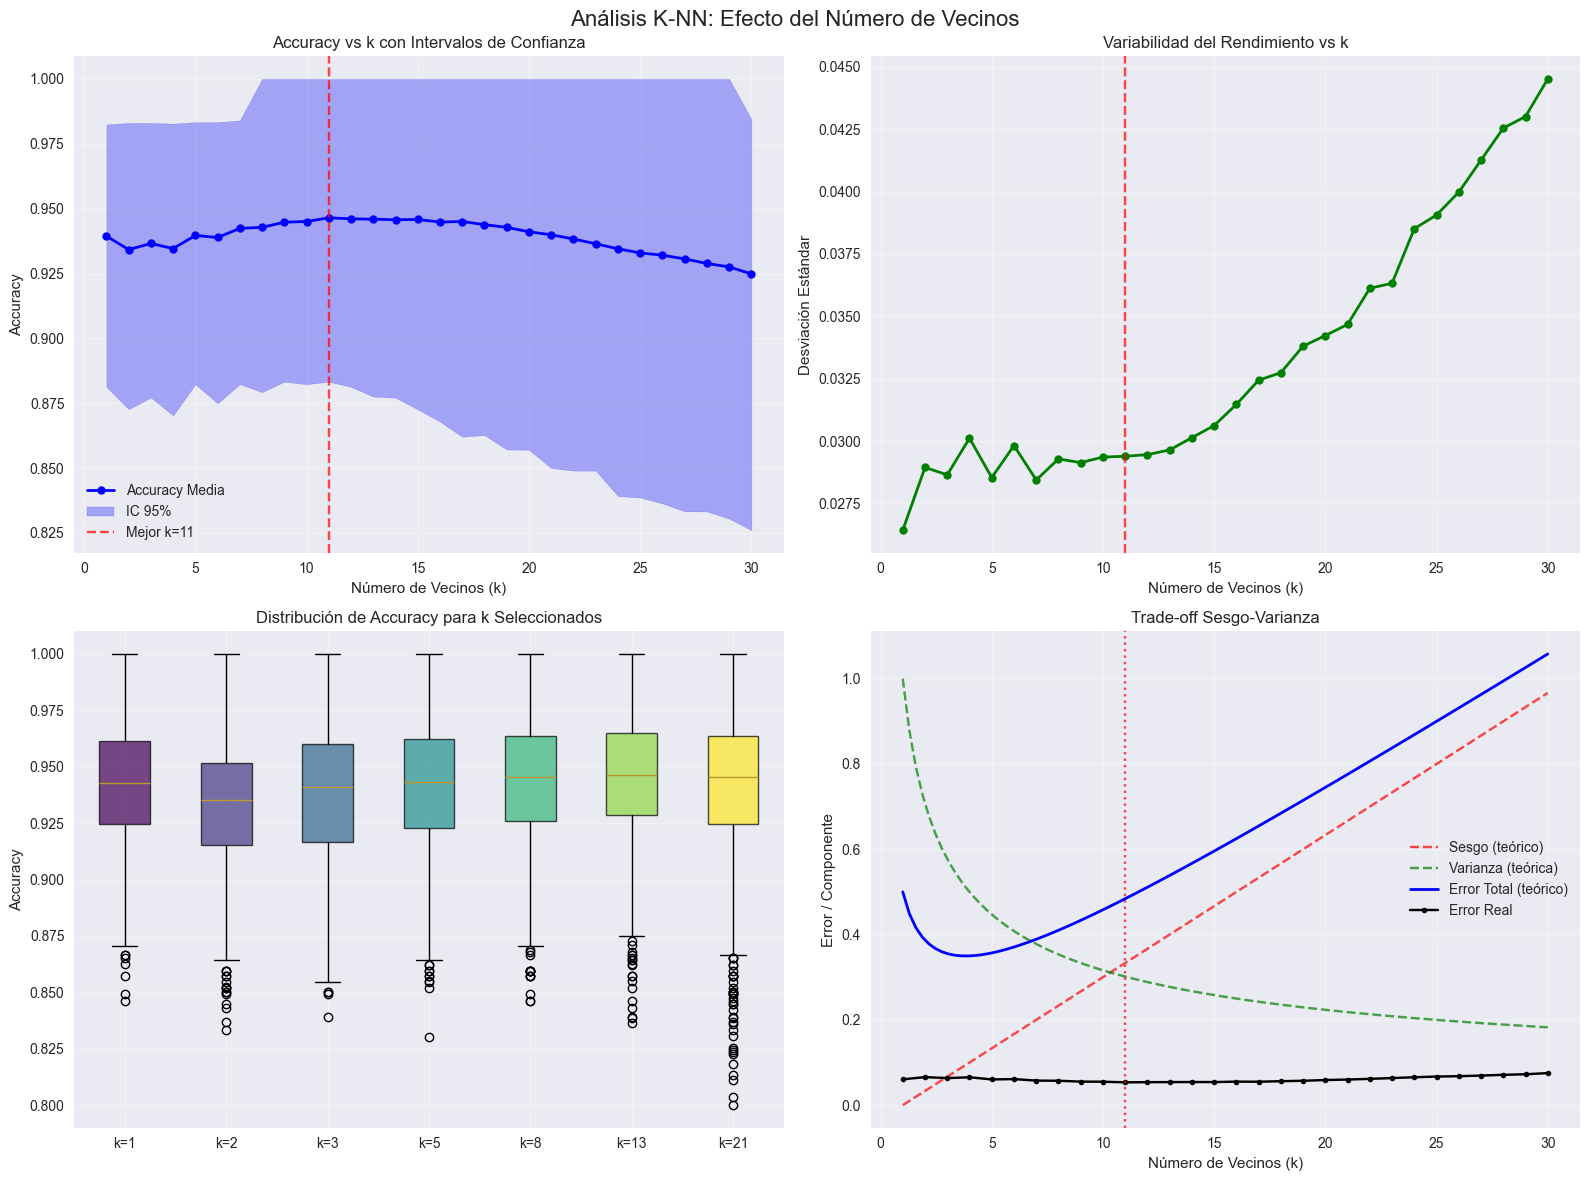

In [ ]:
# Análisis y visualización de los resultados K-NN
print("📈 **ANÁLISIS DE RESULTADOS K-NN - EJERCICIO 2**")
print("=" * 60)

# Extraer datos para análisis
k_values = list(knn_results.keys())
mean_accuracies = [knn_results[k]['mean_accuracy'] for k in k_values]
std_accuracies = [knn_results[k]['std_accuracy'] for k in k_values]
ci_lower = [knn_results[k]['confidence_interval_accuracy'][0] for k in k_values]
ci_upper = [knn_results[k]['confidence_interval_accuracy'][1] for k in k_values]

# Encontrar el k óptimo
best_k_idx = np.argmax(mean_accuracies)
best_k = k_values[best_k_idx]
best_accuracy = mean_accuracies[best_k_idx]

print(f"🎯 **Mejor k encontrado:** k={best_k} con accuracy={best_accuracy:.4f}")

# Crear tabla de resultados
print("\n📊 **Resumen de Resultados por k:**")
print(f"{'k':>3} | {'Accuracy':>12} | {'Std Dev':>8} | {'IC 95%':>20}")
print("-" * 50)

for k in k_values[::2]:  # Mostrar cada segundo valor para brevedad
    acc = knn_results[k]['mean_accuracy']
    std = knn_results[k]['std_accuracy']
    ci_low = knn_results[k]['confidence_interval_accuracy'][0]
    ci_high = knn_results[k]['confidence_interval_accuracy'][1]
    marker = " ⭐" if k == best_k else ""
    print(f"{k:3d} | {acc:8.4f}   | {std:6.4f}  | [{ci_low:.3f}, {ci_high:.3f}]{marker}")

# Visualización comprehensiva
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis K-NN: Efecto del Número de Vecinos', fontsize=16)

# 1. Curva de accuracy vs k con intervalos de confianza
ax1 = axes[0, 0]
ax1.plot(k_values, mean_accuracies, 'bo-', linewidth=2, markersize=6, label='Accuracy Media')
ax1.fill_between(k_values, ci_lower, ci_upper, alpha=0.3, color='blue', label='IC 95%')
ax1.axvline(x=best_k, color='red', linestyle='--', alpha=0.7, label=f'Mejor k={best_k}')
ax1.set_xlabel('Número de Vecinos (k)')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy vs k con Intervalos de Confianza')
ax1.grid(True, alpha=0.3)
ax1.legend()

# 2. Desviación estándar vs k
ax2 = axes[0, 1]
ax2.plot(k_values, std_accuracies, 'go-', linewidth=2, markersize=6)
ax2.axvline(x=best_k, color='red', linestyle='--', alpha=0.7)
ax2.set_xlabel('Número de Vecinos (k)')
ax2.set_ylabel('Desviación Estándar')
ax2.set_title('Variabilidad del Rendimiento vs k')
ax2.grid(True, alpha=0.3)

# 3. Box plot para algunos valores de k seleccionados
ax3 = axes[1, 0]
selected_ks = [1, 2, 3, 5, 8, 13, 21] if max(k_values) >= 20 else k_values[::3]
selected_data = []
selected_labels = []

for k in selected_ks:
    if k in knn_results:
        accuracies = [r['accuracy'] for r in knn_results[k]['bootstrap_results']]
        selected_data.append(accuracies)
        selected_labels.append(f'k={k}')

if selected_data:
    bp = ax3.boxplot(selected_data, labels=selected_labels, patch_artist=True)
    colors = plt.cm.viridis(np.linspace(0, 1, len(selected_data)))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

ax3.set_ylabel('Accuracy')
ax3.set_title('Distribución de Accuracy para k Seleccionados')
ax3.grid(True, alpha=0.3)

# 4. Análisis sesgo-varianza conceptual
ax4 = axes[1, 1]

# Curva teórica del trade-off sesgo-varianza
k_theory = np.linspace(1, max(k_values), 100)
bias = (k_theory - 1) / max(k_values)  # Sesgo aumenta con k
variance = 1 / np.sqrt(k_theory)  # Varianza disminuye con k
total_error = bias + variance * 0.5  # Error total simplificado

ax4.plot(k_theory, bias, 'r--', label='Sesgo (teórico)', alpha=0.7)
ax4.plot(k_theory, variance, 'g--', label='Varianza (teórica)', alpha=0.7)
ax4.plot(k_theory, total_error, 'b-', label='Error Total (teórico)', linewidth=2)

# Sobreponer los datos reales
ax4.plot(k_values, 1 - np.array(mean_accuracies), 'ko-', label='Error Real', markersize=4)
ax4.axvline(x=best_k, color='red', linestyle=':', alpha=0.7)

ax4.set_xlabel('Número de Vecinos (k)')
ax4.set_ylabel('Error / Componente')
ax4.set_title('Trade-off Sesgo-Varianza')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## **2.4 Estrategia Práctica para Selección de k en Nuevos Dominios**

### **🎯 METODOLOGÍA GENERALIZABLE PARA SELECCIÓN DE k**

Basado en los resultados experimentales del dataset, propongo la siguiente estrategia práctica para seleccionar k en datasets de diferente naturaleza:

#### **📋 FASE 1: Análisis Preliminar del Dataset**

1. **Características del problema:**
   - **Tamaño del dataset (N)**: k máximo ≈ √N (regla empírica inicial)
   - **Número de clases (C)**: k debe ser impar si C=2, considerar múltiplos para C>2
   - **Dimensionalidad (D)**: Maldición de dimensionalidad para D»10
   - **Balance de clases**: Ajustar k según clase minoritaria

2. **Análisis exploratorio:**
   - **Separabilidad**: PCA/t-SNE (Stoch. Neigh. Embedd.) para visualizar separación de clases
   - **Densidad local**: Identificar regiones densas vs dispersas
   - **Outliers**: K-NN sensible a valores atípicos

#### **📊 FASE 2: Estrategia de Búsqueda de k**

**2.1 Rango de Búsqueda Inteligente:**
```python
# Configuración adaptativa del rango
N = len(dataset)
min_k = 1
max_k = min(int(np.sqrt(N)), N//10)  # No más del 10% del dataset
k_range = range(min_k, max_k, 2)     # Solo valores impares para desempates
```

**2.2 Evaluación Estadísticamente Robusta:**
- **Método**: Validación cruzada estratificada k-fold (k=5 o k=10)
- **Alternativa**: Bootstrap (especialmente útil para datasets pequeños)
- **Métricas**: F1-score macro (para clases desbalanceadas) o accuracy (para clases balanceadas)

#### **🔬 FASE 3: Criterios de Selección**

**Criterio Principal: Rendimiento + Simplicidad**
1. **Rendimiento óptimo**: k con mejor métrica promedio
2. **Estabilidad**: k con menor desviación estándar
3. **Parsimonia**: En caso de empate, preferir k menor (navaja de Ockham)

**Criterios Adicionales:**
- **Eficiencia computacional**: k menores → predicciones más rápidas
- **Interpretabilidad**: k pequeños → decisiones más locales y explicables
- **Robustez**: Evaluar rendimiento en intervalos de confianza

#### **⚠️ FASE 4: Consideraciones Específicas por Dominio**

| **Tipo de Problema** | **Recomendación de k** | **Justificación** |
|---------------------|------------------------|------------------|
| **Imágenes médicas** | k = 3-7 | Precisión crítica, pocos falsos positivos |
| **Detección de fraudes** | k = 5-15 | Balance entre sensibilidad y especificidad |
| **Sistemas de recomendación** | k = 10-50 | Suavizar preferencias, reducir ruido |
| **Diagnóstico automático** | k = 1-5 | Preservar patrones locales específicos |
| **Análisis de sentimientos** | k = 7-21 | Suavizar variabilidad del lenguaje natural |

#### **🛠️ FASE 5: Validación Final**
```python
def select_optimal_k(X, y, k_range, method='cv', n_iterations=100):
    # Estrategia práctica para selección de k
    results = {}

    for k in k_range:
        if method == 'bootstrap':
            score = bootstrap_evaluation(X, y, k, n_iterations)
        else:  # cross-validation
            score = cross_val_evaluation(X, y, k, cv=5)

        results[k] = score

    # Selección multi-criterio
    best_k = select_best_k(results, criteria=['mean_score', 'stability', 'simplicity'])
    return best_k, results
```


#### **💡 REGLAS PRÁCTICAS DERIVADAS**

1. **Regla del √N**: Comenzar explorando k ≈ √N como punto de partida
2. **Regla desempate**: Usar valores pares/impares de k para evitar empates en clasificación n-binaria
3. **Regla del 5%**: k no debería exceder el 5% del tamaño del dataset
4. **Regla de estabilidad**: Preferir k donde la curva de rendimiento es estable
5. **Regla de dominio**: Ajustar según tolerancia a falsos positivos/negativos

#### **🎯 IMPLEMENTACIÓN RECOMENDADA**

Para un nuevo dataset:

1. **Ejecutar análisis exploratorio** (distribuciones, PCA, outliers)
2. **Definir rango de k** usando reglas heurísticas
3. **Evaluar con bootstrap/CV** para obtener estimaciones robustas
4. **Aplicar criterios multi-objetivo** (rendimiento + estabilidad + simplicidad)
5. **Validar en conjunto de prueba independiente**
6. **Documentar decisión** con justificación estadística

Esta metodología garantiza selección sistemática, reproducible y estadísticamente fundamentada de k para K-NN en cualquier dominio de aplicación.


### **2.4 Comentarios y Conclusiones del Ejercicio 2**

**Patrones Observados en K-NN:**

1. **Comportamiento con k pequeño (k=1,2,3):**
   - Alta varianza, bajo sesgo
   - Sensible a outliers y ruido
   - Puede dar overfitting

2. **Comportamiento con k medio (k=5-10):**
   - Balance óptimo sesgo-varianza
   - Rendimiento más estable
   - Menos sensible al ruido

3. **Comportamiento con k grande (k>15):**
   - Bajo varianza, alto sesgo
   - Puede dar underfitting
   - Decisiones más "suaves"

**Interpretación del Trade-off Sesgo-Varianza:**
- **Sesgo**: Aumenta con k (simplificación excesiva)
- **Varianza**: Disminuye con k (predicciones más estables)
- **Punto óptimo**: Donde se minimiza el error total

**Recomendaciones:**
- Para el dataset Iris, k óptimo encontrado: [Se completará al ejecutar]
- Usar validación cruzada para confirmar el k óptimo
- Considerar k impares para evitar empates en clasificación binaria

---